In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
df=pd.read_csv('mix_cleaned.csv')

In [36]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          121 non-null    int64  
 1   month        121 non-null    int64  
 2   year         121 non-null    int64  
 3   Temperature  121 non-null    int64  
 4   RH           121 non-null    int64  
 5   Ws           121 non-null    int64  
 6   Rain         121 non-null    float64
 7   FFMC         121 non-null    float64
 8   DMC          121 non-null    float64
 9   DC           121 non-null    float64
 10  ISI          121 non-null    float64
 11  BUI          121 non-null    float64
 12  FWI          121 non-null    float64
 13  Classes      121 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 13.4+ KB


In [38]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [39]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [40]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [41]:
df['Classes'].value_counts()

Classes
fire             78
not fire         41
not fire          1
not fire          1
Name: count, dtype: int64

In [42]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [43]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
116,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
117,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
118,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
119,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0
120,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0


In [44]:
df['Classes'].value_counts()

Classes
1    78
0    43
Name: count, dtype: int64

In [45]:
x=df.drop('FWI',axis=1)

In [46]:
y=df['FWI']

In [47]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0
...,...,...,...,...,...,...,...,...,...,...
116,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1
117,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0
118,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0
119,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0


In [48]:
y

0      0.2
1      0.2
2      0.1
3      1.0
4      0.9
      ... 
116    6.5
117    0.0
118    0.2
119    0.7
120    0.5
Name: FWI, Length: 121, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [50]:
X_train.shape,X_test.shape

((90, 10), (31, 10))

In [51]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
Temperature,1.000000,-0.516221,-0.148683,-0.135914,0.587525,0.404227,0.331249,0.529565,0.391978,0.519822
RH,-0.516221,1.000000,0.014511,0.195940,-0.673630,-0.369996,-0.274098,-0.701824,-0.356503,-0.466919
Ws,-0.148683,0.014511,1.000000,-0.139414,0.098500,0.089629,0.069449,0.199996,0.087771,0.099408
Rain,-0.135914,0.195940,-0.139414,1.000000,-0.532790,-0.344343,-0.349494,-0.419341,-0.354044,-0.463739
FFMC,0.587525,-0.673630,0.098500,-0.532790,1.000000,0.570826,0.491637,0.767946,0.570128,0.800153
DMC,0.404227,-0.369996,0.089629,-0.344343,0.570826,1.000000,0.919766,0.652202,0.992267,0.532455
DC,0.331249,-0.274098,0.069449,-0.349494,0.491637,0.919766,1.000000,0.511397,0.941726,0.483847
ISI,0.529565,-0.701824,0.199996,-0.419341,0.767946,0.652202,0.511397,1.000000,0.640169,0.704340
BUI,0.391978,-0.356503,0.087771,-0.354044,0.570128,0.992267,0.941726,0.640169,1.000000,0.551610
Classes,0.519822,-0.466919,0.099408,-0.463739,0.800153,0.532455,0.483847,0.704340,0.551610,1.000000


<Axes: >

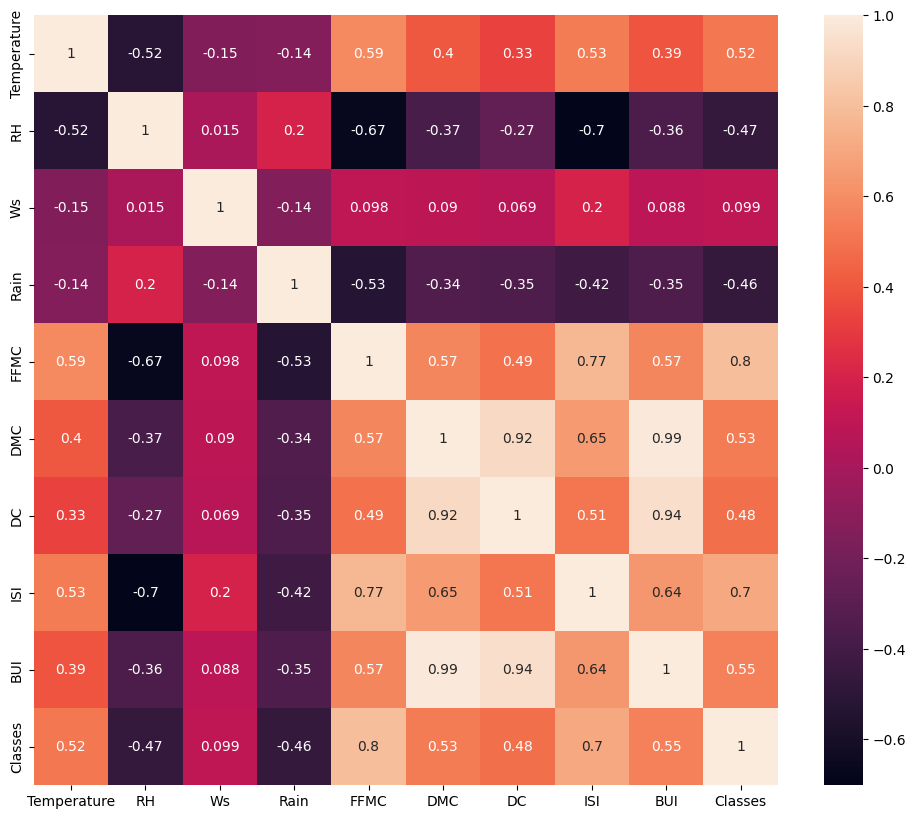

In [52]:
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [53]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [54]:
corr_features=correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [55]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((90, 8), (31, 8))

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

In [57]:
X_train_scaled

array([[ 0.50670746,  0.74034875,  0.0882538 , -0.4015985 ,  0.14296971,
         1.05763421, -0.51578083,  0.74278135],
       [-0.05284679,  0.25900746,  0.50629812,  0.03612997, -0.55723404,
        -0.74178317, -0.88627129, -1.3462912 ],
       [-0.61240104,  0.46529658,  0.0882538 , -0.46413113,  0.19239585,
        -0.82580266, -0.40681305,  0.74278135],
       [-0.05284679,  0.12148137,  0.50629812, -0.46413113,  0.53837888,
        -0.13264188,  0.22520008,  0.74278135],
       [ 0.50670746, -1.46006859,  0.92434244, -0.46413113,  0.92555037,
         0.42048642,  1.77254259,  0.74278135],
       [-1.45173241,  0.19024442,  1.34238676,  0.9115869 , -1.42219162,
        -1.00784488, -0.97344552, -1.3462912 ],
       [ 1.62581595,  0.60282267, -2.42001211,  0.28626052, -0.59018481,
        -0.41270684, -0.99523908, -1.3462912 ],
       [-2.5708409 , -0.08480775,  1.34238676, -0.4015985 , -0.10416103,
        -0.93082702, -0.86447774, -1.3462912 ],
       [-0.89217816, -0.9787273 

<Axes: >

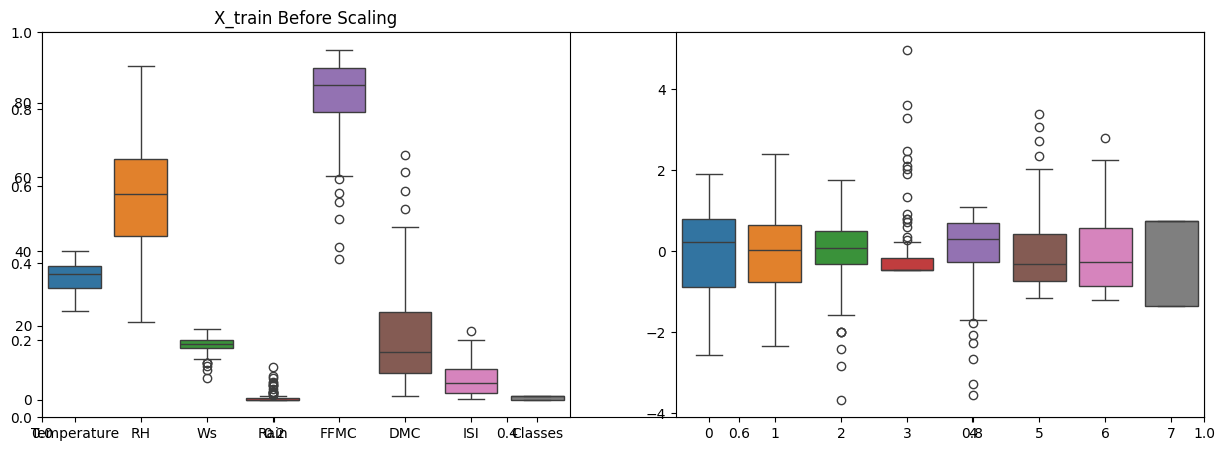

In [58]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled )

mean absolute error 1.190702768496912
R2 Score 0.843883547117065


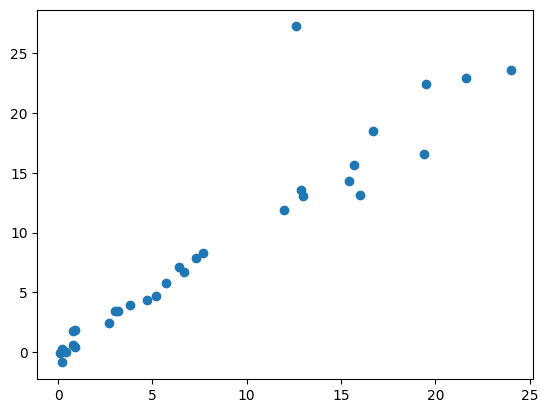

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)


Lasso

Mean absolute error 1.3533285014629628
R2 score 0.8856973732041287


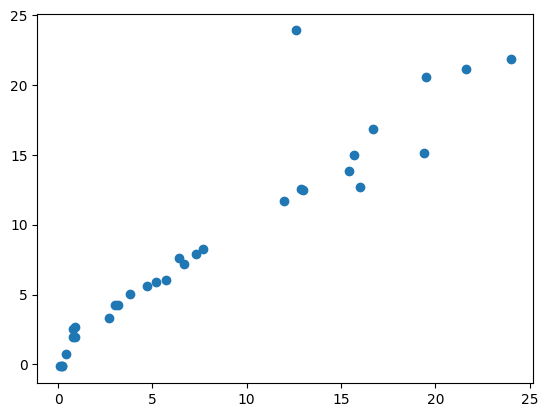

In [60]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

In [61]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [62]:
lassocv.alpha_

np.float64(0.015831590623716193)

In [63]:
lassocv.alphas_

array([7.87941996, 7.34837343, 6.85311765, 6.39124046, 5.96049224,
       5.55877501, 5.18413218, 4.83473902, 4.5088938 , 4.20500944,
       3.92160588, 3.65730277, 3.4108128 , 3.18093544, 2.96655103,
       2.76661542, 2.5801548 , 2.406261  , 2.24408707, 2.09284311,
       1.95179249, 1.82024821, 1.69756957, 1.58315906, 1.47645944,
       1.37695102, 1.28414913, 1.19760177, 1.11688742, 1.04161295,
       0.97141172, 0.90594182, 0.84488438, 0.787942  , 0.73483734,
       0.68531177, 0.63912405, 0.59604922, 0.5558775 , 0.51841322,
       0.4834739 , 0.45088938, 0.42050094, 0.39216059, 0.36573028,
       0.34108128, 0.31809354, 0.2966551 , 0.27666154, 0.25801548,
       0.2406261 , 0.22440871, 0.20928431, 0.19517925, 0.18202482,
       0.16975696, 0.15831591, 0.14764594, 0.1376951 , 0.12841491,
       0.11976018, 0.11168874, 0.10416129, 0.09714117, 0.09059418,
       0.08448844, 0.0787942 , 0.07348373, 0.06853118, 0.0639124 ,
       0.05960492, 0.05558775, 0.05184132, 0.04834739, 0.04508

In [64]:
lassocv.mse_path_

array([[54.04415834, 89.06620563, 94.47851852, 39.06223735, 67.70119776],
       [48.35630181, 89.06620563, 93.42309125, 34.05830006, 60.48570717],
       [43.38431165, 81.00900138, 83.62516564, 29.72152725, 54.24069075],
       [39.03662927, 70.59617505, 75.06260229, 25.94977102, 48.8376776 ],
       [34.61177552, 61.53495019, 67.57724566, 22.66937684, 44.16506952],
       [30.30513962, 53.64972801, 61.03135467, 19.81636242, 40.1259339 ],
       [26.55535054, 46.78753872, 55.30495621, 17.3350919 , 36.63608481],
       [23.28990697, 40.81540253, 48.67718383, 15.17706253, 33.27238584],
       [20.44599652, 35.61750265, 42.72423532, 13.30020394, 28.72405668],
       [17.96896978, 31.09350761, 37.53255321, 11.66788762, 24.79836835],
       [15.81127827, 27.15572267, 33.00323625, 10.24825634, 21.41121705],
       [13.93120864, 23.72799854, 29.05237408,  9.01360266, 18.49062251],
       [12.29349333, 20.74409068, 25.60471095,  7.93982839, 15.97410493],
       [10.86641557, 18.14637006, 22.5

mean absolute error= 1.1820344548730033
R2_score= 0.8856973732041287


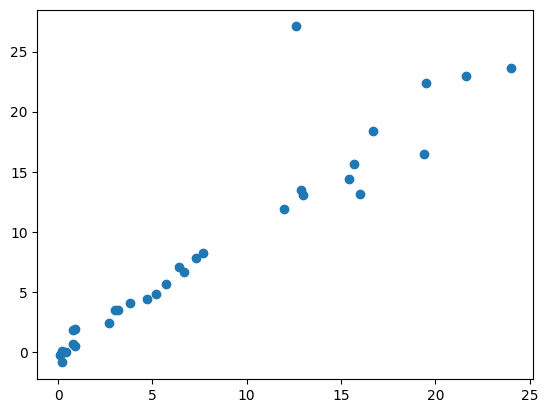

In [65]:
y_pred=lassocv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("mean absolute error=",mae)
print("R2_score=",score)

RIDGE REGRESSION

Mean absolute error 1.16138264916712
r2 score 0.8534387597603872


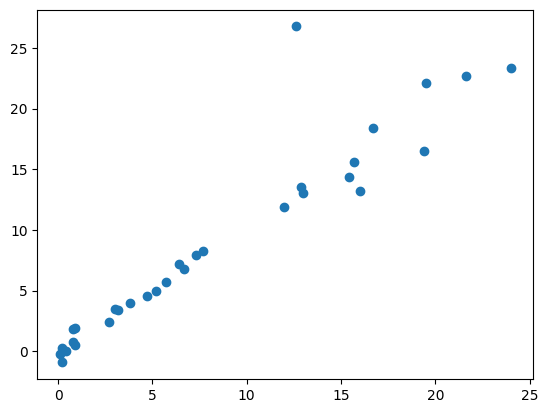

In [67]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("r2 score",score)
plt.scatter(y_test,y_pred)

Mean absolute error 1.1876113536211872
r2 score 0.8449256297561407


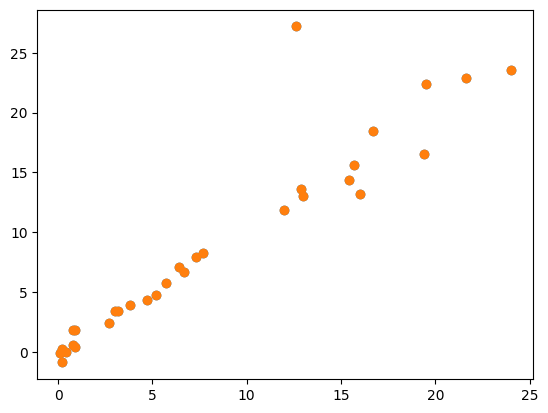

In [72]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_absolute_error
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("r2 score",score)
plt.scatter(y_test,y_pred)

mean absolute error 1.9014310977912219
score 0.8869253720831716


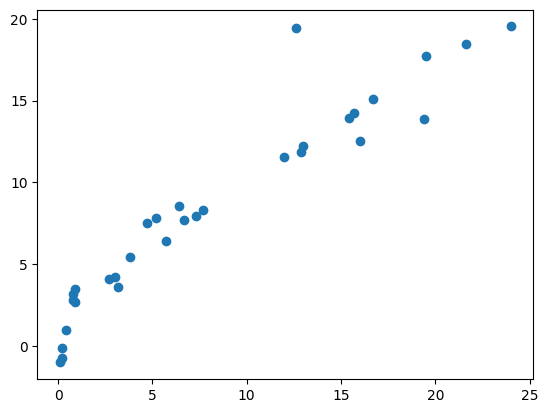

In [73]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("mean absolute error",mae)
print("score",score)
plt.scatter(y_test,y_pred)

mean absolute error 1.1623023646683093
score 0.8522351805255464


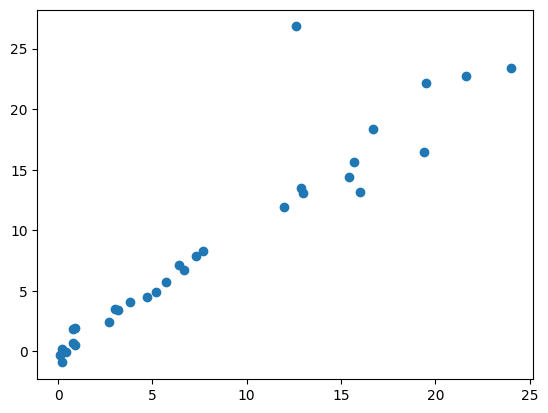

In [74]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error,r2_score
elasticcv=ElasticNetCV()
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("mean absolute error",mae)
print("score",score)
plt.scatter(y_test,y_pred)

In [ ]:
#pickling

In [75]:
scaler

StandardScaler()

In [76]:
ridge

Ridge()

In [77]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))